## Neural Network

In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn import preprocessing
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

##### Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented

### Encoding

In [2]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
# Reading the csv files
df = pd.read_csv('Comp1111_data_csv.csv')
df = df[2:]
df = df.drop(columns=['Regno','ES'])

# Preprocessing
le = preprocessing.LabelEncoder()
df['Tutgroup'] = le.fit_transform(df['Tutgroup'])
df.reset_index(inplace = True)

le = preprocessing.LabelEncoder()
df['Crse/Prog'] = le.fit_transform(df['Crse/Prog'])
df.reset_index(inplace = True)

#Replacing '.' to zeros
df = df.replace(to_replace= '.' , value = 0)

# String to numeric Conversion
df['S'] = pd.to_numeric(df['S'])
df['lab2'] = pd.to_numeric(df['lab2'])
df['Unnamed: 6'] = pd.to_numeric(df['Unnamed: 6'])
df['lab4'] = pd.to_numeric(df['lab4'])
df['Unnamed: 8'] = pd.to_numeric(df['Unnamed: 8'])
df['h2'] = pd.to_numeric(df['h2'])
df['Unnamed: 10'] = pd.to_numeric(df['Unnamed: 10'])
df['p1'] = pd.to_numeric(df['p1'])
df['Unnamed: 12'] = pd.to_numeric(df['Unnamed: 12'])
df['mid'] = pd.to_numeric(df['mid'])
df['Unnamed: 14'] = pd.to_numeric(df['Unnamed: 14'])
df['final'] = pd.to_numeric(df['final'])

X = df.drop(columns = ['final'])
Y = df[['final']]

# Normalization
X['lab2'] = X['lab2'] / 3
X['Unnamed: 6'] = X['Unnamed: 6'] / 5
X['lab4'] = X['lab4'] / 3
X['Unnamed: 8'] = X['Unnamed: 8'] / 20
X['h2'] = X['h2'] / 20
X['Unnamed: 10'] = X['Unnamed: 10'] / 3
X['p1'] = X['p1'] / 20
X['Unnamed: 12'] = X['Unnamed: 12'] / 20
X['mid'] = X['mid'] / 45
X['Unnamed: 14'] = X['Unnamed: 14'] / 3

Y['final'] = Y['final']/100
X = X.drop(columns = ['level_0','index'])

C:\Users\Prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)

X = X_train1.values

Y = Y_train1.values

# Converting dataframes values to tensor
X_test1_tensor = torch.Tensor(X_test1.values).float()
Y_test1_tensor = torch.Tensor(Y_test1.values).float()

In [4]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
feature_size = X_train1.shape[1]
hidden_layes = 15
hidden_layes_1 = 10
learning_rate = 1e-2
epochs = 500

# Regression class model
class Regression_Net(nn.Module):
    def __init__(self,feature_size, hidden, hidden_1,n_output):
        super(Regression_Net, self).__init__()
        self.layer_1 = nn.Linear(feature_size,hidden)
        self.layer_2 = nn.Linear(hidden, hidden_1)
        self.layer_3 = nn.Linear(hidden_1,n_output)
        
    def forward(self,x):
        fc = self.layer_1(x)
        x = (fc)
        x = (self.layer_2(x))
        output_layer = (self.layer_3(x))
        return output_layer
    
regression_neural_network = Regression_Net(feature_size,hidden_layes,hidden_layes_1,n_output=1)
#optimizer
optimizer = torch.optim.Adam(regression_neural_network.parameters(),lr = 1e-4)
# Loss function
loss_function = nn.MSELoss()

#### Training of the model

Training error at 1 epoch is 0.3776305615901947


C:\Users\Prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


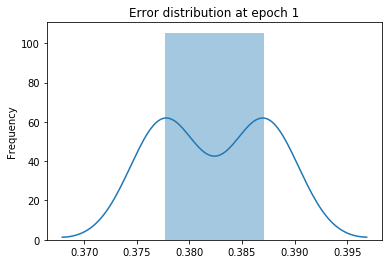

Training error at 100 epoch is 0.051100414246320724


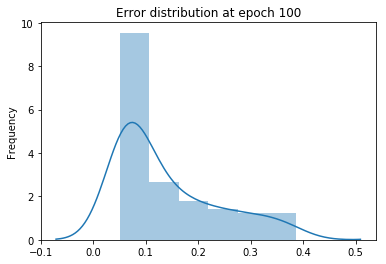

Training error at 200 epoch is 0.04178202152252197


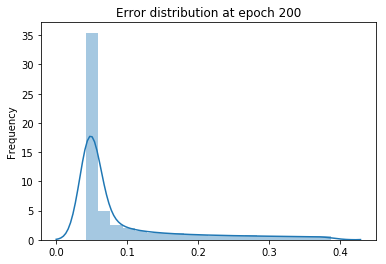

Training error at 300 epoch is 0.033965010195970535


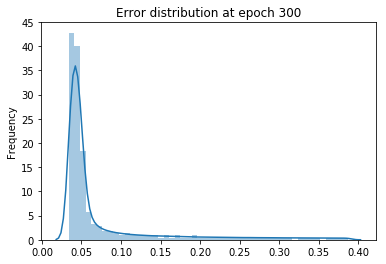

Training error at 400 epoch is 0.027345331385731697


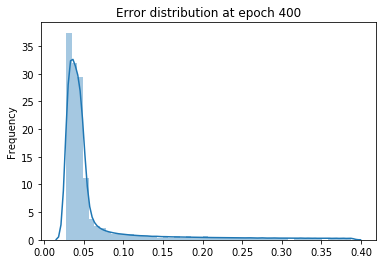

In [5]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
X_train_tensor = torch.Tensor(X_train1.values).float()
Y_train_tensor = torch.Tensor(Y_train1.values).float()

losses_array1 = []

for ep in range(epochs):
    train_prediction = regression_neural_network(X_train_tensor)

    loss = loss_function(train_prediction,Y_train_tensor)
    
    losses_array1.append(loss.item()) # Appending the loss to an array
    
    if ep == 1:
        print("Training error at",ep,"epoch is",losses_array1[ep])
        sns.distplot(losses_array1) # Plotting of the graph
        plt.title("Error distribution at epoch 1")
        plt.ylabel("Frequency")
        plt.show()
    
    if ep == 100:
        print("Training error at",ep,"epoch is",losses_array1[ep])
        sns.distplot(losses_array1) # Plotting of the graph
        plt.title("Error distribution at epoch 100")
        plt.ylabel("Frequency")
        plt.show()
        
    if ep == 200 :
        print("Training error at",ep,"epoch is",losses_array1[ep])
        sns.distplot(losses_array1) # Plotting of the graph
        plt.title("Error distribution at epoch 200")
        plt.ylabel("Frequency")
        plt.show()
        
    if ep == 300 :
        print("Training error at",ep,"epoch is",losses_array1[ep])
        sns.distplot(losses_array1) # Plotting of the graph
        plt.title("Error distribution at epoch 300")
        plt.ylabel("Frequency")
        plt.show()
        
    if ep == 400 :
        print("Training error at",ep,"epoch is",losses_array1[ep])
        sns.distplot(losses_array1) # Plotting of the graph
        plt.title("Error distribution at epoch 400")
        plt.ylabel("Frequency")
        plt.show()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

#### Testing of the model

In [6]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
test_prediction = regression_neural_network(X_test1_tensor)
loss_on_test_data = loss_function(test_prediction,Y_test1_tensor)
print('test loss: %f' % loss_on_test_data.item())

test loss: 0.030787


## Neural network using BDR

### Encoding

In [7]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
# Reading the csv files
df = pd.read_csv('Comp1111_data_csv.csv')
df = df[2:]
df = df.drop(columns=['Regno','ES'])

# Preprocessing
le = preprocessing.LabelEncoder()
df['Tutgroup'] = le.fit_transform(df['Tutgroup'])
df.reset_index(inplace = True)

le = preprocessing.LabelEncoder()
df['Crse/Prog'] = le.fit_transform(df['Crse/Prog'])
df.reset_index(inplace = True)

#Replacing '.' to zeros
df = df.replace(to_replace= '.' , value = 0)
# String to numeric Conversion
df['S'] = pd.to_numeric(df['S'])
df['lab2'] = pd.to_numeric(df['lab2'])
df['Unnamed: 6'] = pd.to_numeric(df['Unnamed: 6'])
df['lab4'] = pd.to_numeric(df['lab4'])
df['Unnamed: 8'] = pd.to_numeric(df['Unnamed: 8'])
df['h2'] = pd.to_numeric(df['h2'])
df['Unnamed: 10'] = pd.to_numeric(df['Unnamed: 10'])
df['p1'] = pd.to_numeric(df['p1'])
df['Unnamed: 12'] = pd.to_numeric(df['Unnamed: 12'])
df['mid'] = pd.to_numeric(df['mid'])
df['Unnamed: 14'] = pd.to_numeric(df['Unnamed: 14'])
df['final'] = pd.to_numeric(df['final'])

X = df.drop(columns = ['final'])
Y = df[['final']]

# Normalization
X['lab2'] = X['lab2'] / 3
X['Unnamed: 6'] = X['Unnamed: 6'] / 5
X['lab4'] = X['lab4'] / 3
X['Unnamed: 8'] = X['Unnamed: 8'] / 20
X['h2'] = X['h2'] / 20
X['Unnamed: 10'] = X['Unnamed: 10'] / 3
X['p1'] = X['p1'] / 20
X['Unnamed: 12'] = X['Unnamed: 12'] / 20
X['mid'] = X['mid'] / 45
X['Unnamed: 14'] = X['Unnamed: 14'] / 3

Y['final'] = Y['final'] / 100
X = X.drop(columns = ['level_0','index'])

C:\Users\Prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train1 = X_train1.reset_index(drop = True)
Y_train1 = Y_train1.reset_index(drop=True)

In [9]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
Training_set_index = X_train1.index
Testing_set_index = Y_train1.index

In [10]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
feature_size = X_train1.shape[1]
hidden_layes = 15
hidden_layes_1 = 10
learning_rate = 1e-2
epochs = 500

# Regression class model
class Regression_Net(nn.Module):
    def __init__(self,feature_size, hidden, hidden_1,n_output):
        super(Regression_Net, self).__init__()
        self.layer_1 = nn.Linear(feature_size,hidden)
        self.layer_2 = nn.Linear(hidden, hidden_1)
        self.layer_3 = nn.Linear(hidden_1,n_output)
        
    def forward(self,x):
        fc = self.layer_1(x)
        x = (fc)
        x = (self.layer_2(x))
        output_layer = (self.layer_3(x))
        return output_layer
    
regression_neural_network = Regression_Net(feature_size,hidden_layes,hidden_layes_1,n_output=1)
#optimizer
optimizer = torch.optim.Adam(regression_neural_network.parameters(),lr = 1e-4)
# Loss function
loss_function = nn.MSELoss()

### Applying BDR on the training set

Training error at 100 is 0.18990333378314972
Epoch Number 100
Mean error 0.381531
Standard deviation error 0.2105646
Threshold error 0.4868132993578911
Number of data points removed from the dataset at 100 epoch is 40




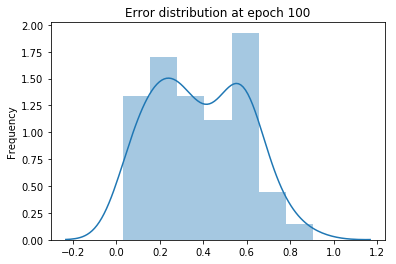

Training error at 200 is 0.03849923610687256
Epoch Number 200
Mean error 0.16774964
Standard deviation error 0.10178062
Threshold error 0.21863995492458344
Number of data points removed from the dataset at 200 epoch is 22




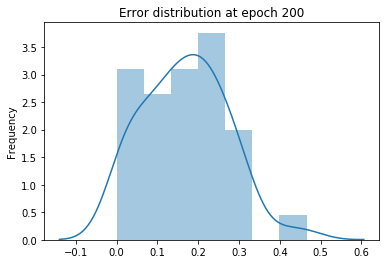

In [11]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
losses_array = []
variance_array = []

for ep in range(epochs):
    new_index = []
    loss_array = []
    X_train_tensor = torch.Tensor(X_train1.values).float()
    Y_train_tensor = torch.Tensor(Y_train1.values).float()
    
    train_prediction = regression_neural_network(X_train_tensor)
    loss = loss_function(train_prediction,Y_train_tensor)
    losses_array.append(loss.item())
    
    if (ep % 100 == 0 and ep > 0) :
        loss_array = (Y_train_tensor - train_prediction).detach().numpy()
        loss_array = np.abs(loss_array)
        variance = np.var(loss_array)
        variance_array.append(variance)
        if variance <= 0.01:
             break
        else:
            mean_error = np.mean(loss_array)
            standard_error = np.std(loss_array)
            threshold_error = mean_error + 0.5*standard_error
            print("Training error at",ep,"is",losses_array[-1])
            print("Epoch Number",ep)
            print("Mean error",mean_error)
            print("Standard deviation error",standard_error)
            print("Threshold error",threshold_error)
            
            for t in range(len(loss_array)):
                if (loss_array[t] >= threshold_error):
                    new_index.append(t)
                    
        X_train1 = X_train1.drop(new_index)
        X_train1 = X_train1.reset_index(drop = True)
        Y_train1 = Y_train1.drop(new_index)
        Y_train1 = Y_train1.reset_index(drop = True)
        print("Number of data points removed from the dataset at",ep, "epoch is",len(new_index))
        print("\n")
        sns.distplot(loss_array) # Plotting of the graph
        plt.title("Error distribution at epoch "+ str(ep))
        plt.ylabel("Frequency")
        plt.show()
 
        
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

### Testing of the model

In [12]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
test_prediction = regression_neural_network(X_test1_tensor)
loss_on_test_data = loss_function(test_prediction,Y_test1_tensor)
print('test loss: %f' % loss_on_test_data.item())

test loss: 0.065668


### Error graph between the feed forward neural network and the feed forward neural network with BDR algorithm applied

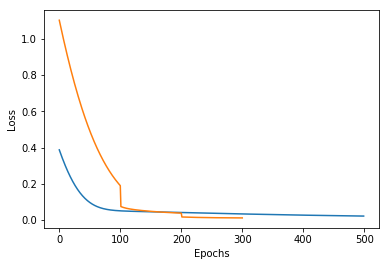

In [13]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
plt.plot(losses_array1)
plt.plot(losses_array)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Applying BDR on dataset intially and then applying train and test on that dataset

### Applying BDR

### Encoding

In [14]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
# Reading the csv files
df = pd.read_csv('Comp1111_data_csv.csv')
df = df[2:]
df = df.drop(columns=['Regno','ES'])

# Preprocessing
le = preprocessing.LabelEncoder()
df['Tutgroup'] = le.fit_transform(df['Tutgroup'])
df.reset_index(inplace = True)

le = preprocessing.LabelEncoder()
df['Crse/Prog'] = le.fit_transform(df['Crse/Prog'])
df.reset_index(inplace = True)

#Replacing '.' to zeros
df = df.replace(to_replace= '.' , value = 0)
# String to numeric Conversion
df['S'] = pd.to_numeric(df['S'])
df['lab2'] = pd.to_numeric(df['lab2'])
df['Unnamed: 6'] = pd.to_numeric(df['Unnamed: 6'])
df['lab4'] = pd.to_numeric(df['lab4'])
df['Unnamed: 8'] = pd.to_numeric(df['Unnamed: 8'])
df['h2'] = pd.to_numeric(df['h2'])
df['Unnamed: 10'] = pd.to_numeric(df['Unnamed: 10'])
df['p1'] = pd.to_numeric(df['p1'])
df['Unnamed: 12'] = pd.to_numeric(df['Unnamed: 12'])
df['mid'] = pd.to_numeric(df['mid'])
df['Unnamed: 14'] = pd.to_numeric(df['Unnamed: 14'])
df['final'] = pd.to_numeric(df['final'])

X = df.drop(columns = ['final'])
Y = df[['final']]

# Normalization
X['lab2'] = X['lab2'] / 3
X['Unnamed: 6'] = X['Unnamed: 6'] / 5
X['lab4'] = X['lab4'] / 3
X['Unnamed: 8'] = X['Unnamed: 8'] / 20
X['h2'] = X['h2'] / 20
X['Unnamed: 10'] = X['Unnamed: 10'] / 3
X['p1'] = X['p1'] / 20
X['Unnamed: 12'] = X['Unnamed: 12'] / 20
X['mid'] = X['mid'] / 45
X['Unnamed: 14'] = X['Unnamed: 14'] / 3

Y['final'] = Y['final']/100
X = X.drop(columns = ['level_0','index'])

C:\Users\Prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size= 0, random_state=42)
X_train1 = X_train1.reset_index(drop = True)
Y_train1 = Y_train1.reset_index(drop=True)

In [16]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
feature_size = X_train1.shape[1]
hidden_layes = 15
hidden_layes_1 = 10
learning_rate = 1e-2
epochs = 500

# Regression class model
class Regression_Net(nn.Module):
    def __init__(self,feature_size, hidden, hidden_1,n_output):
        super(Regression_Net, self).__init__()
        self.layer_1 = nn.Linear(feature_size,hidden)
        self.layer_2 = nn.Linear(hidden, hidden_1)
        self.layer_3 = nn.Linear(hidden_1,n_output)
        
    def forward(self,x):
        fc = self.layer_1(x)
        x = (fc)
        x = (self.layer_2(x))
        output_layer = (self.layer_3(x))
        return output_layer
    
regression_neural_network = Regression_Net(feature_size,hidden_layes,hidden_layes_1,n_output=1)
#optimizer
optimizer = torch.optim.Adam(regression_neural_network.parameters(),lr = 1e-4)
# Loss function
loss_function = nn.MSELoss()

### Applying the BDR algorithm

Training error at 50 is 0.25965946912765503
Epoch Number 50
Mean error 0.46656546
Standard deviation error 0.20488086
Threshold error 0.5485178053379058
Number of data points removed from the dataset at 50 epoch is 54




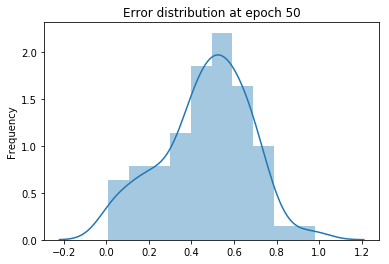

Training error at 100 is 0.07670805603265762
Epoch Number 100
Mean error 0.2491469
Standard deviation error 0.12097058
Threshold error 0.2975351244211197
Number of data points removed from the dataset at 100 epoch is 38




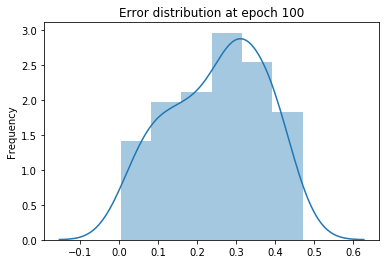

In [17]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
losses_array = []
variance_array = []

for ep in range(epochs):
    new_index = []
    loss_array = []
    X_train_tensor = torch.Tensor(X_train1.values).float()
    Y_train_tensor = torch.Tensor(Y_train1.values).float()
    
    train_prediction = regression_neural_network(X_train_tensor)
    loss = loss_function(train_prediction,Y_train_tensor)
    losses_array.append(loss.item())
    
    if (ep % 50 == 0 and ep > 0) :
        loss_array = (Y_train_tensor - train_prediction).detach().numpy()
        loss_array = np.abs(loss_array)
        variance = np.var(loss_array)
        variance_array.append(variance)
        if variance <= 0.01:
             break
        else:
            mean_error = np.mean(loss_array)
            standard_error = np.std(loss_array)
            threshold_error = mean_error + 0.4*standard_error
            print("Training error at",ep,"is",losses_array[-1])
            print("Epoch Number",ep)
            print("Mean error",mean_error)
            print("Standard deviation error",standard_error)
            print("Threshold error",threshold_error)
            
            for t in range(len(loss_array)):
                if (loss_array[t] >= threshold_error):
                    new_index.append(t)
                    
        X_train1 = X_train1.drop(new_index)
        X_train1 = X_train1.reset_index(drop = True)
        Y_train1 = Y_train1.drop(new_index)
        Y_train1 = Y_train1.reset_index(drop = True)
        print("Number of data points removed from the dataset at",ep, "epoch is",len(new_index))
        print("\n")
        sns.distplot(loss_array) # Plotting of the graph
        plt.title("Error distribution at epoch "+ str(ep))
        plt.ylabel("Frequency")
        plt.show()
 
        
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

#### Now applying Neural network on the new dataset after removing the dataset using BDR algorithm

In [18]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
X_neural_train, X_neural_test, Y_neural_train, Y_neural_test = train_test_split(X_train1, Y_train1, test_size= 0.2, random_state=42)
X_test1_tensor = torch.Tensor(X_neural_test.values).float()
Y_test1_tensor = torch.Tensor(Y_neural_test.values).float()

In [19]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
feature_size = X_train1.shape[1]
hidden_layes = 15
hidden_layes_1 = 10
learning_rate = 1e-2
epochs = 500

# Regression class model
class Regression_Net(nn.Module):
    def __init__(self,feature_size, hidden, hidden_1,n_output):
        super(Regression_Net, self).__init__()
        self.layer_1 = nn.Linear(feature_size,hidden)
        self.layer_2 = nn.Linear(hidden, hidden_1)
        self.layer_3 = nn.Linear(hidden_1,n_output)
        
    def forward(self,x):
        fc = self.layer_1(x)
        x = (fc)
        x = (self.layer_2(x))
        output_layer = (self.layer_3(x))
        return output_layer
    
regression_neural_network = Regression_Net(feature_size,hidden_layes,hidden_layes_1,n_output=1)
#optimizer
optimizer = torch.optim.Adam(regression_neural_network.parameters(),lr = 1e-4)
# Loss function
loss_function = nn.MSELoss()

#### Training of the model

In [20]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
X_train_tensor = torch.Tensor(X_neural_train.values).float()
Y_train_tensor = torch.Tensor(Y_neural_train.values).float()

losses_array1 = []

for ep in range(epochs):
    train_prediction = regression_neural_network(X_train_tensor)

    loss = loss_function(train_prediction,Y_train_tensor)
    
    losses_array1.append(loss.item())
    
    if ep % 50 == 0 :
        print("Training error at",ep,"is",losses_array1[ep])

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    

Training error at 0 is 0.38308435678482056
Training error at 50 is 0.13775579631328583
Training error at 100 is 0.047838278114795685
Training error at 150 is 0.026347771286964417
Training error at 200 is 0.022755887359380722
Training error at 250 is 0.021498240530490875
Training error at 300 is 0.020419051870703697
Training error at 350 is 0.01939111016690731
Training error at 400 is 0.01840967684984207
Training error at 450 is 0.017472535371780396


#### Testing of the model

In [21]:
# Reference - Most of the coding is taken or inspired from the lab 3 solutions in which regression model is been implemented
test_prediction = regression_neural_network(X_test1_tensor)
loss_on_test_data = loss_function(test_prediction,Y_test1_tensor)
print('test loss: %f' % loss_on_test_data.item())

test loss: 0.018416
